In [6]:
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
df = pd.read_csv('2011.csv', skiprows=1, low_memory=False)
df = df.drop(columns=['id', 'member_id'])

df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,5000,5000,4975.0,36,0.11,162.87,B,B2,NaN,10+ years,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,2500,2500,2500.0,60,0.15,59.83,C,C4,Ryder,< 1 year,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,2400,2400,2400.0,36,0.16,84.33,C,C5,NaN,10+ years,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,10000,10000,10000.0,36,0.13,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,3000,3000,3000.0,60,0.13,67.79,B,B5,University Medical Group,1 year,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_using = df[['int_rate', 'loan_amnt', 'term', 'home_ownership', 'annual_inc']]

df_using = df_using.dropna()

In [12]:
df_using.head()

,int_rate,loan_amnt,term,home_ownership,annual_inc
0,0.11,5000,36,RENT,24000.0
1,0.15,2500,60,RENT,30000.0
2,0.16,2400,36,RENT,12252.0
3,0.13,10000,36,RENT,49200.0
4,0.13,3000,60,RENT,80000.0


In [ ]:
#you are a customer you want to loan 1000, 36, OWN, 30000
#what interest reate would you get?

In [16]:
df_using['home_ownership'].value_counts()

RENT        18918
MORTGAGE    17703
OWN          3064
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [25]:
#remove other and none 

df_using = df_using.loc[(df_using['home_ownership'] == "RENT")|(df_using['home_ownership'] == "MORTGAGE")|(df_using['home_ownership'] == "OWN"), :]

In [28]:
df_using['home_ownership'].value_counts()

RENT        18918
MORTGAGE    17703
OWN          3064
Name: home_ownership, dtype: int64

In [29]:
df_using['term'].value_counts()

36    28996
60    10689
Name: term, dtype: int64

In [30]:
df_using.dtypes

int_rate          float64
loan_amnt           int64
term                int64
home_ownership     object
annual_inc        float64
dtype: object

In [31]:
df_using = pd.get_dummies(df_using)
df_using.head()

,int_rate,loan_amnt,term,annual_inc,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT
0,0.11,5000,36,24000.0,0,0,1
1,0.15,2500,60,30000.0,0,0,1
2,0.16,2400,36,12252.0,0,0,1
3,0.13,10000,36,49200.0,0,0,1
4,0.13,3000,60,80000.0,0,0,1


In [32]:
df_using.columns


Index(['int_rate', 'loan_amnt', 'term', 'annual_inc',
       'home_ownership_MORTGAGE', 'home_ownership_OWN', 'home_ownership_RENT'],
      dtype='object')

In [33]:
X = df_using[['loan_amnt', 'term', 'annual_inc',
       'home_ownership_MORTGAGE', 'home_ownership_OWN', 'home_ownership_RENT']]
y = df_using['int_rate'].values.reshape(-1,1)
print (X.shape, y.shape)

(39685, 6) (39685, 1)


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [35]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [36]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [37]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
X_train_scaled[0]

array([-0.83790114, -0.60531269, -0.32484204,  1.11272464, -0.28946245,
       -0.95289397])

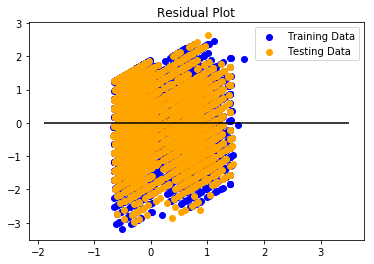

In [39]:
prediction = model.predict(X_test_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [40]:
from sklearn.metrics import mean_squared_error

In [41]:
predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.7581378419931755, R2: 0.2522012747051168


In [ ]:
#the variables we used - loan amount, term, home ownership, annual income was not a good model to predict the interest rate. 